# Character Recognition

Task-

> Use this [dataset](https://www.dropbox.com/s/pan6mutc5xj5kj0/trainPart1.zip) to train a
CNN. Use no other data source or pretrained networks, and explain your design choices during preprocessing, model building and training. Also, cite the sources you used to
borrow techniques. A test set will be provided later to judge the performance of your
classifier. Please save your model checkpoints.

## 1. Importing Modules

In [1]:
import random
import copy
import time 
import pandas as pd 

import torch
import torchvision
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
from data_py import dataset
from plotting_py import plot_loss, plot_images
from model_py import Net
from train_py import train_model

## 2. Data Preprocessing

In [3]:
df = pd.read_csv('../input/training/Labels.csv')
df.head()

,Unnamed: 0,filenames,labels_code,labels
0,0,img001-001.png,img001,0
1,1,img001-002.png,img001,0
2,2,img001-003.png,img001,0
3,3,img001-004.png,img001,0
4,4,img001-007.png,img001,0


In [4]:
train_transforms = transforms.Compose([
                   transforms.RandomRotation(degrees=45),
                   transforms.RandomResizedCrop(64, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean = [0.5,0.5,0.5], std = [0.5,0.5,0.5])

               ])

In [5]:
LABELS='../input/training/Labels.csv' 
ROOT = '../input/training/train/train'
VALID_RATIO = 0.80

train_data = dataset(csv=LABELS, img_path=ROOT, transform = train_transforms)

In [6]:
n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples
train_data, valid_data = data.random_split(train_data,[n_train_examples, n_valid_examples])

In [7]:
valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = train_transforms

In [8]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')

Number of training examples: 1984
Number of validation examples: 496


In [9]:
BATCH_SIZE = 256
train_iterator = data.DataLoader(train_data,batch_size = BATCH_SIZE)
valid_iterator = data.DataLoader(valid_data,batch_size = BATCH_SIZE)

## 3. Images

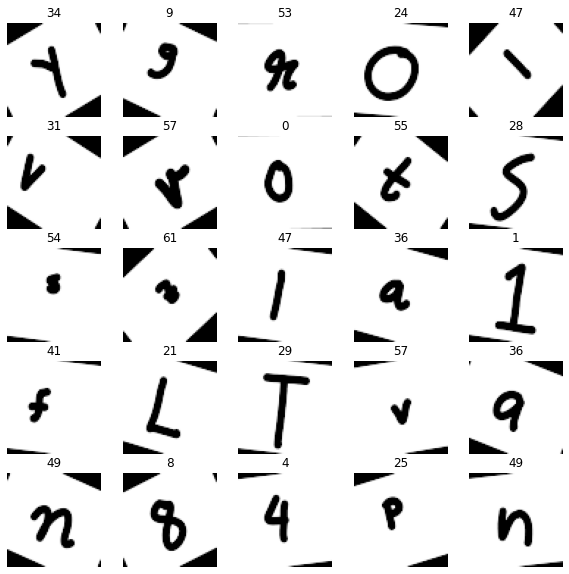

In [10]:
N_IMAGES = 25
images, labels = zip(*[(image, label) for image, label in [train_data[i] for i in range(N_IMAGES)]])
classes = list(df['labels'].unique())
plot_images(images, labels, classes)

## 4. Hyper-parameters

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 40
model = Net(62)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
device

device(type='cuda')

## 5. Training

In [12]:
train_loss_list, valid_loss_list = train_model(model=model, num_epochs=num_epochs,
                                             train_iterator=train_iterator,
                                             valid_iterator=valid_iterator, 
                                             optimizer=optimizer,
                                             criterion=criterion, device=device)

Epoch: 1 	Training Loss: 4.128762 	Validation Loss: 4.129863
Validation loss decreased (inf --> 4.129863).  Saving model ...
Epoch: 2 	Training Loss: 4.125976 	Validation Loss: 4.133655
Epoch: 3 	Training Loss: 4.121420 	Validation Loss: 4.135140
Epoch: 4 	Training Loss: 4.091327 	Validation Loss: 4.064495
Validation loss decreased (4.129863 --> 4.064495).  Saving model ...
Epoch: 5 	Training Loss: 4.006496 	Validation Loss: 3.955488
Validation loss decreased (4.064495 --> 3.955488).  Saving model ...
Epoch: 6 	Training Loss: 3.965530 	Validation Loss: 3.946859
Validation loss decreased (3.955488 --> 3.946859).  Saving model ...
Epoch: 7 	Training Loss: 3.942086 	Validation Loss: 3.929545
Validation loss decreased (3.946859 --> 3.929545).  Saving model ...
Epoch: 8 	Training Loss: 3.900043 	Validation Loss: 3.871677
Validation loss decreased (3.929545 --> 3.871677).  Saving model ...
Epoch: 9 	Training Loss: 3.789175 	Validation Loss: 3.743767
Validation loss decreased (3.871677 --> 3.

## 6. Plotting Loss and Accuracy of model

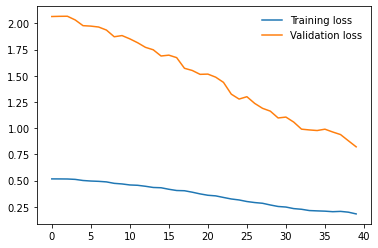

In [13]:
import matplotlib.pyplot as plt 
plt.plot(train_loss_list, label='Training loss')
plt.plot(valid_loss_list, label='Validation loss')
plt.legend(frameon=False)

## 7. Results

# Conclusion